# Profiling for the Diagnosis Dataset
Long Haul Covid Group - BMI6016

In [2]:
import pandas as pd
pd.options.display.max_rows=None
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Following code was found on this stack overflow page: https://stackoverflow.com/questions/44144843/find-number-of-rows-in-large-csv-file-using-python
def row_count(input):
    with open(input) as f:
        for i, l in enumerate(f):
            pass
    return i
row_count('diagnosis.csv')
#This cell calculates the number of rows= 324,179,748

In [3]:
head=pd.read_csv('diagnosis.csv', nrows=1, header=0)
head.head()

,patient_id,encounter_id,code_system,code,date,derived_by_TriNetX
0,c11adeff031d0701c258e12d950b9e090545875f,bbbb71e6ac3e6c880e285112b2e4d12c2d2a17c7,ICD-10-CM,J12.81,20200623,F


The above code shows the columns for this dataset. Because the we are looking for characteristics of patients with long haul covid both before and after, we will want to drop the ‘encounter_id’ because it contains information about location and provider while we are only interested in the diagnosis and date of the diagnosis for each patient.We will also drop the ‘derived_by_TriNetX’ column because it is also not relevant information for our purposes.


In [8]:
#The diagnosis.csv file is 39.9 GB is size. To large for this computer to be able to read into a single dataframe.
#By trail and error while also knowing the number of rows in the dataset. I made smaller dataframes that could be handled.
dia=pd.read_csv('diagnosis.csv', nrows=100000000, dtype='object')

In [9]:
dia.head()

,patient_id,encounter_id,code_system,code,date,derived_by_TriNetX
0,c11adeff031d0701c258e12d950b9e090545875f,bbbb71e6ac3e6c880e285112b2e4d12c2d2a17c7,ICD-10-CM,J12.81,20200623,F
1,c11adeff031d0701c258e12d950b9e090545875f,7689171769ec1a373b96cdfd751a6742aa940cc4,ICD-10-CM,R06.02,20200811,F
2,22b795bccab41c629d40bb00f3decd919efdbc83,a96d7fd5df63cbac44a0cf93ac7580e818e50570,ICD-10-CM,B34.2,20200721,F
3,22b795bccab41c629d40bb00f3decd919efdbc83,a96d7fd5df63cbac44a0cf93ac7580e818e50570,ICD-10-CM,C83.36,20200721,F
4,22b795bccab41c629d40bb00f3decd919efdbc83,a96d7fd5df63cbac44a0cf93ac7580e818e50570,ICD-10-CM,G47.33,20200721,F


In [17]:
print(dia.shape)
dia=dia.drop_duplicates()
print(dia.shape)

(100000000, 4)
(76365111, 4)


In [14]:
dia=dia.drop(columns=['encounter_id'])

In [15]:
dia=dia.drop(columns=['derived_by_TriNetX'])

In [20]:
dia2=dia2.drop(columns=['derived_by_TriNetX'])

In [21]:
item_counts2=dia2['code'].value_counts()

In [22]:
dia3=pd.read_csv('diagnosis.csv',skiprows=range(1,200000000), nrows=100000000)

In [23]:
print(dia3.shape)
dia3=dia3.drop_duplicates()
print(dia3.shape)

(100000000, 6)
(71839084, 6)


In [24]:
dia3=dia3.drop(columns=['encounter_id'])

In [25]:
dia3=dia3.drop(columns=['derived_by_TriNetX'])

In [26]:
item_counts3=dia3['code'].value_counts()

In [27]:
dia4=pd.read_csv('diagnosis.csv', skiprows=range(1,300000000))

In [28]:
print(dia4.shape)
dia4=dia4.drop_duplicates()
print(dia4.shape)

(24179749, 6)
(24179749, 6)


In [29]:
dia4=dia4.drop(columns=['encounter_id'])

In [30]:
dia4=dia4.drop(columns=['derived_by_TriNetX'])

In [31]:
item_counts4=dia4['code'].value_counts()

In [28]:
#This cell shows the code systems used in this dataset
df_list=[dia, dia2, dia3, dia4]
for i in df_list:
    dia_uc=i['code_system'].unique()
    print(dia_uc)

['ICD-10-CM' 'ICD-9-CM' nan]
['ICD-10-CM' 'ICD-9-CM' nan]
['ICD-10-CM' 'ICD-9-CM']
['ICD-10-CM' 'ICD-9-CM']


The above results shows only the code systems 'ICD-10-CM' and 'ICD-9-CM' are used.

We need to find if there are any missing entries and determine what to do with them.

In [39]:
bad_codes=dia[dia['code_system'].isna()]
bad_codes

,0,2,3,4
23318901,b5c0a64fe9b37266885d3d7ec8646b1029cbd478,NaN,27730,20200411


In [40]:
bad_codes=dia2[dia2['code_system'].isna()]
bad_codes

,0,1,2,3,4,5
4698364,2afbb3ea6cf813027edfd8597d4e39d83839a8fe,84eace526291e99c9b66560d97d76b3ba67f3711,NaN,LP16654-3,20190125,F
25800651,e4d4e978cc17247410a63a596be386192c04b30c,2420aa56396b666535fc413ed1c4fde3a54b7441,NaN,LP16654-3,20151117,F


In [41]:
nulls=dia[dia.isna().any(axis=1)]
nulls

,0,2,3,4
23318901,b5c0a64fe9b37266885d3d7ec8646b1029cbd478,NaN,27730,20200411


In [51]:
nulls=dia2[dia2.isna().any(axis=1)]
nulls

,0,2,3,4
4698364,2afbb3ea6cf813027edfd8597d4e39d83839a8fe,NaN,LP16654-3,20190125
25800651,e4d4e978cc17247410a63a596be386192c04b30c,NaN,LP16654-3,20151117


In [52]:
nulls=dia3[dia3.isna().any(axis=1)]
nulls

,0,2,3,4


In [53]:
nulls=dia4[dia4.isna().any(axis=1)]
nulls

,0,2,3,4


There were only 3 entries with missing values for the code system. The most conservative approach is to just drop these rows because we do not know which system they code for and it is only a minimal amount of potential information lost.

In [32]:
dia=dia.dropna()
dia2=dia2.dropna()

Now we need to make sure that all the code represent good information. To do this we need to check that each code appears in the code system it is associated with. If it is not found in our terminology.csv, we will assume that it was encoded improperly and get rid of it.

In [99]:
icd9cm=pd.read_csv('ICD9_Codes.csv')

In [100]:
icd10cm=pd.read_csv('ICD10_Codes.csv')

In [158]:
icd10=icd10cm['code'].tolist()
print(len(icd10))
icd9=icd9cm['code'].tolist()
print(len(icd9))
for i in icd9:
    icd10.append(i)
print(len(icd10))

97895
106301
204196


In [161]:
x=dia.isin(icd10)

In [160]:
x=x[x['code']==False]
x.shape

(0, 6)

In [162]:
x=dia2.isin(icd10)

In [163]:
x=x[x['code']==False]
x.shape

(0, 6)

In [164]:
x=dia3.isin(icd10)

In [165]:
x=x[x['code']==False]
x.shape

(0, 6)

In [166]:
x=dia4.isin(icd10)

In [167]:
x=x[x['code']==False]
x.shape

(0, 6)

In [168]:
head=pd.read_csv('patient.csv', nrows=1)

In [169]:
head

,patient_id,sex,race,ethnicity,year_of_birth,age_at_death,postal_code
0,c11adeff031d0701c258e12d950b9e090545875f,M,Unknown,Unknown,1967,NaN,NaN


In [170]:
pats=pd.read_csv('patient.csv')

In [171]:
pats=pats['patient_id'].tolist()

In [175]:
len(pats)

1670657

In [172]:
x=dia.isin(pats)

In [178]:
x=x[x['patient_id']==False]
x.shape

(0, 6)

In [179]:
x=dia2.isin(pats)

In [180]:
x=x[x['patient_id']==False]
x.shape

(0, 6)

In [181]:
x=dia3.isin(pats)

In [182]:
x=x[x['patient_id']==False]
x.shape

(0, 6)

In [183]:
x=dia4.isin(pats)

In [184]:
x=x[x['patient_id']==False]
x.shape

(0, 6)

In [145]:
error

NameError: name 'error' is not defined

In [97]:
sum_column = item_counts.combine(item_counts2, max, fill_value=0)

In [98]:
sum_column = sum_column.combine(item_counts3, max, fill_value=0)

In [99]:
sum_column = sum_column.combine(item_counts4, max, fill_value=0)

In [217]:
p_counts = dia['patient_id'].value_counts()

In [199]:
p_counts2 = dia2['patient_id'].value_counts()

In [200]:
p_counts3 = dia3['patient_id'].value_counts()

In [201]:
p_counts4 = dia4['patient_id'].value_counts()

In [235]:
p_counts4.median()

181.0

In [218]:
p_cob=p_counts.combine(p_counts2, max, fill_value=0)

In [219]:
p_cob=p_cob.combine(p_counts3, max, fill_value=0)

In [220]:
p_cob=p_cob.combine(p_counts4, max, fill_value=0)

In [222]:
p_cob.describe()

count    1.563759e+06
mean     1.637881e+02
std      4.870727e+02
min      1.000000e+00
25%      1.000000e+01
50%      4.100000e+01
75%      1.390000e+02
max      6.923800e+04
Name: 0, dtype: float64

In [240]:
p_cob.median()

41.0

(array([    0.,     0., 65594.,     0.,     0., 82948.,     0., 44206.,
            0.,     0., 43974.,     0., 33104.,     0.,     0., 33070.,
            0., 26827.,     0.,     0., 26953.,     0., 23029.,     0.,
            0., 22965.,     0., 20315.,     0.,     0., 20210.,     0.,
        18235.,     0.,     0., 18149.,     0., 16852.,     0.,     0.,
        16548.,     0., 15235.,     0.,     0., 15318.,     0., 14562.,
            0.,     0., 14244.,     0., 13348.,     0.,     0., 13196.,
            0., 12331.,     0.,     0., 12506.,     0., 11621.,     0.,
            0., 11667.,     0., 11026.,     0.,     0., 11052.,     0.,
        10632.,     0.,     0., 10449.,     0., 10073.,     0.,     0.,
         9936.,     0.,  9402.,     0.,     0.,  9412.,     0.,  9178.,
            0.,     0.,  8903.,     0.,  8698.,     0.,     0.,  8508.,
            0.,  7983.,     0.,  8113.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8, 

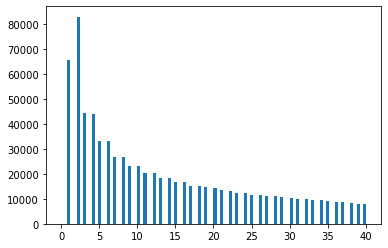

In [241]:
plt.hist(p_cob, 100, range= (0,40))

Now we must transform this data by only keeping the patients that we have determined have covid for this project. Then we will preform some of the same data profiling as before.

In [71]:
pats=pd.read_csv('master.csv')

In [72]:
pats=pats['patient_id'].tolist()

In [74]:
x=dia[dia.patient_id.isin(pats)]
#gapminder[~gapminder.continent.isin(continents)]
x.shape

(7867752, 4)

In [75]:
x2=dia[dia.patient_id.isin(pats)]

In [76]:
x3=dia[dia.patient_id.isin(pats)]

In [77]:
x4=dia[dia.patient_id.isin(pats)]

In [78]:
xc=x['patient_id'].value_counts()

In [79]:
xc2=x2['patient_id'].value_counts()

In [80]:
xc3=x3['patient_id'].value_counts()

In [81]:
xc4=x4['patient_id'].value_counts()

In [82]:
xcc=xc.combine(xc2, max, fill_value=0)

In [83]:
xcc=xcc.combine(xc3, max, fill_value=0)

In [84]:
xcc=xcc.combine(xc4, max, fill_value=0)

In [85]:
xcc.describe()

count    95354.000000
mean        82.510980
std        252.293781
min          1.000000
25%          4.000000
50%         17.000000
75%         66.000000
max      23847.000000
Name: patient_id, dtype: float64

In [86]:
xcc.median()

17.0

(array([    0.,     0., 10299.,     0.,     0.,  6986.,     0.,  4552.,
            0.,     0.,  3968.,     0.,  3074.,     0.,     0.,  2884.,
            0.,  2293.,     0.,     0.,  2209.,     0.,  1834.,     0.,
            0.,  1670.,     0.,  1467.,     0.,     0.,  1392.,     0.,
         1256.,     0.,     0.,  1215.,     0.,  1093.,     0.,     0.,
         1098.,     0.,  1050.,     0.,     0.,   993.,     0.,   930.,
            0.,     0.,   872.,     0.,   800.,     0.,     0.,   808.,
            0.,   730.,     0.,     0.,   728.,     0.,   676.,     0.,
            0.,   660.,     0.,   671.,     0.,     0.,   636.,     0.,
          617.,     0.,     0.,   599.,     0.,   573.,     0.,     0.,
          536.,     0.,   516.,     0.,     0.,   528.,     0.,   511.,
            0.,     0.,   492.,     0.,   466.,     0.,     0.,   470.,
            0.,   432.,     0.,   493.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8, 

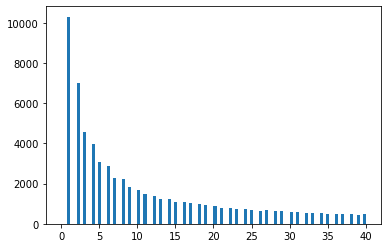

In [87]:
plt.hist(xcc, 100, range= (0,40))

In [88]:
xco=x['code'].value_counts()

In [89]:
xco2=x2['code'].value_counts()

In [90]:
xco3=x3['code'].value_counts()

In [91]:
xco4=x4['code'].value_counts()

In [92]:
xcoo=xco.combine(xco2, max, fill_value=0)

In [94]:
xcoo=xcoo.combine(xco3, max, fill_value=0)

In [95]:
xcoo=xcoo.combine(xco4, max, fill_value=0)

In [96]:
xcoo.to_csv('Covid_pats_common_codes.csv')

Now I will use the the terminology.csv to create two csvs one that show the most common codes for the whole dataset and one for just the Covid patients.

In [100]:
icd10cm=pd.read_csv('ICD10_Codes.csv')
icd9cm=pd.read_csv('ICD9_Codes.csv')

In [104]:
cco=xcoo.index.tolist()

In [106]:
ctow={}
for i in range(200):
    x=icd10cm[icd10cm['code'].str.contains(cco[i])]
    a=icd9cm[icd9cm['code'].str.contains(cco[i])]
    if len(x)==1:
        y=x['code_description'].tolist()
        ctow.update({cco[i]:y})
    if len(a)==1:
        b=a['code_description'].tolist()
        ctow.update({cco[i]:b})

In [ ]:
s=pd.Series(ctow)
s.to_csv('200_Common_Codes_Covid_pats.csv')

In [107]:
cco=sum_column.index.tolist()

In [108]:
ctow={}
for i in range(200):
    x=icd10cm[icd10cm['code'].str.contains(cco[i])]
    a=icd9cm[icd9cm['code'].str.contains(cco[i])]
    if len(x)==1:
        y=x['code_description'].tolist()
        ctow.update({cco[i]:y})
    if len(a)==1:
        b=a['code_description'].tolist()
        ctow.update({cco[i]:b})

In [ ]:
s=pd.Series(ctow)
s.to_csv('200_Common_Codes.csv')